# <b><span style='color:#F1A424'>AutoDataPrep - Regression - Fish Weight - Deploy Data</span> </b> 

### Disclaimer
The sample code (“Sample Code”) provided is not covered by any Teradata agreements. Please be aware that Teradata has no control over the model responses to such sample code and such response may vary. The use of the model by Teradata is strictly for demonstration purposes and does not constitute any form of certification or endorsement. The sample code is provided “AS IS” and any express or implied warranties, including the implied warranties of merchantability and fitness for a particular purpose, are disclaimed. In no event shall Teradata be liable for any direct, indirect, incidental, special, exemplary, or consequential damages (including, but not limited to, procurement of substitute goods or services; loss of use, data, or profits; or business interruption) sustained by you or a third party, however caused and on any theory of liability, whether in contract, strict liability, or tort arising in any way out of the use of this sample code, even if advised of the possibility of such damage.

## <b> Problem overview - Regression </b>

**Dataset used : Fish Weight Dataset**

**Features**:

- `Species`: Species name of fish
- `Length1`: Vertical length in cm
- `Length2`: Diagonal length in cm
- `Length3`: Cross length in cm
- `Height`: Height in cm
- `Width`: Diagonal width in cm

**Target Variable**:

- `Weight`: Weight of fish in gram

        
**Objective**:

The primary objective is typically to build a model that can accurately predict weight of fish in gram.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in auto run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

In [1]:
# Importing AutoDataPrep from teradataml
from teradataml import AutoDataPrep

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','fish')

In [5]:
# Fetching in teradata dataframe
fish_df = DataFrame("fish")

In [6]:
fish_df

Species,Weight,Length1,Length2,Length3,Height,Width
Pike,300,32.7,35.0,38.8,5.9364,4.3844
Pike,430,35.5,38.0,40.5,7.29,4.5765
Pike,345,36.0,38.5,41.0,6.396,3.977
Pike,456,40.0,42.5,45.5,7.28,4.3225
Pike,540,40.1,43.0,45.8,7.786,5.1296
Pike,500,42.0,45.0,48.0,6.96,4.896
Pike,510,40.0,42.5,45.5,6.825,4.459
Pike,300,34.8,37.3,39.8,6.2884,4.0198
Pike,300,31.7,34.0,37.8,5.7078,4.158
Pike,200,30.0,32.3,34.8,5.568,3.3756


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoDataPrep </b>

2026-01-21 11:35:32,648 | INFO     | Feature Exploration started
2026-01-21 11:35:32,650 | INFO     | Data Overview:
2026-01-21 11:35:32,938 | INFO     | Total Rows in the data: 159
2026-01-21 11:35:33,210 | INFO     | Total Columns in the data: 7
2026-01-21 11:35:39,588 | INFO     | Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
Length1,FLOAT,159,0,None,0,159,0,0.0,100.0
Height,FLOAT,159,0,None,0,159,0,0.0,100.0
Species,VARCHAR(20) CHARACTER SET LATIN,159,0,0,None,None,None,0.0,100.0
Width,FLOAT,159,0,None,0,159,0,0.0,100.0
Length2,FLOAT,159,0,None,0,159,0,0.0,100.0
Weight,INTEGER,159,0,None,1,158,0,0.0,100.0
Length3,FLOAT,159,0,None,0,159,0,0.0,100.0


2026-01-21 11:35:43,616 | INFO     | Statistics of Data:


ATTRIBUTE,StatName,StatValue
Length2,MAXIMUM,63.4
Length2,STANDARD DEVIATION,10.716328098884249
Length2,PERCENTILES(25),21.0
Length2,PERCENTILES(50),27.3
Height,COUNT,159.0
Height,MINIMUM,1.7284
Height,MAXIMUM,18.957
Height,MEAN,8.970993710691824
Height,STANDARD DEVIATION,4.286207619968866
Height,PERCENTILES(25),5.9448


2026-01-21 11:35:44,384 | INFO     | Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
Species                   7         
2026-01-21 11:35:51,992 | INFO     | No Futile columns found.
2026-01-21 11:35:56,789 | INFO     | Target Column Distribution:


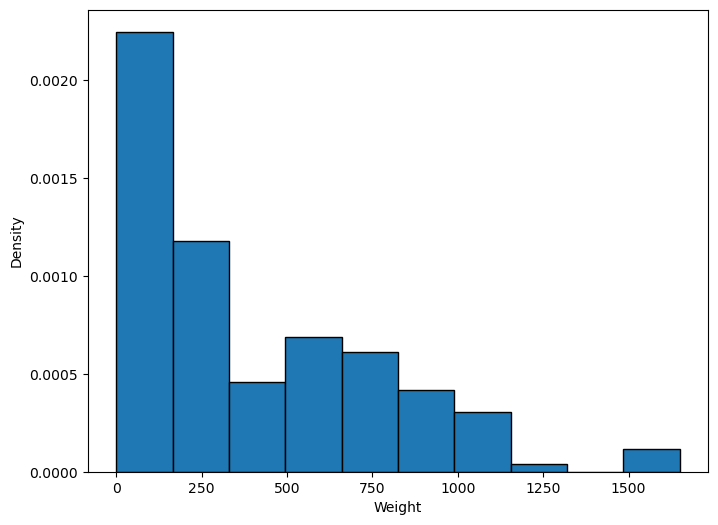

2026-01-21 11:36:10,294 | INFO     | Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                             
  ColumnName  OutlierPercentage
0    Length3           0.628931
1    Length2           1.886792
2    Length1           1.886792


2026-01-21 11:36:10,763 | INFO     | Feature Engineering started ...                    
2026-01-21 11:36:10,769 | INFO     | Handling duplicate records present in dataset ...  
2026-01-21 11:36:11,837 | INFO     | Analysis completed. No action taken.               
2026-01-21 11:36:11,839 | INFO     | Total time to handle duplicate records: 1.06 sec   
2026-01-21 11:36:11,849 | INFO     | Handling less significant features from data ...   
2026-01-21 11:36:15,248 | INFO     | Analysis indicates all categorical columns are significant. No action Needed.
2026-01-21 11:36:15,250 | INFO     | Total time to handle less significant features: 3.40 sec  
2026-01-21 11:36:15,260 | INFO     | Handling Date Features ...                          
2026-01-21 11:36:15,268 | INFO     | Analysis Completed. Dataset does not contain any feature related to dates. No action needed.
2026-01-21 11:36:15,271 | INFO     | Total time to handle date features: 0.00 sec        
2026-01-21 11:36:15,276 | INFO    

Species_0,Species_1,Species_2,Species_3,Species_4,Species_5,Species_6,Weight,Length1,Length2,Length3,Height,Width,automl_id
1,0,0,0,0,0,0,450,26.8,29.7,34.7,13.6024,4.9274,26
1,0,0,0,0,0,0,450,27.6,30.0,35.1,14.0049,4.8438,38
1,0,0,0,0,0,0,500,28.5,30.7,36.2,14.2266,4.9594,42
1,0,0,0,0,0,0,475,28.4,31.0,36.2,14.2628,5.1042,46
1,0,0,0,0,0,0,500,29.1,31.5,36.4,13.7592,4.368,54
1,0,0,0,0,0,0,340,29.5,32.0,37.3,13.9129,5.0728,58
0,0,0,1,0,0,0,300,32.7,35.0,38.8,5.9364,4.3844,12
0,0,0,1,0,0,0,430,35.5,38.0,40.5,7.29,4.5765,20
0,0,0,1,0,0,0,345,36.0,38.5,41.0,6.396,3.977,24
0,0,0,1,0,0,0,456,40.0,42.5,45.5,7.28,4.3225,28


2026-01-21 11:36:26,779 | INFO     | Time taken to encode the columns: 9.54 sec          


2026-01-21 11:36:26,784 | INFO     | Data preparation started ...                        
2026-01-21 11:36:26,795 | INFO     | Outlier preprocessing ...                           
2026-01-21 11:36:40,098 | INFO     | Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                             
  ColumnName  OutlierPercentage
0    Length3           0.628931
1    Length2           1.886792
2    Length1           1.886792
2026-01-21 11:36:41,057 | INFO     | Deleting rows of these columns:                     
['Length2', 'Length1', 'Length3']                                                        
2026-01-21 

Species_0,Species_1,Species_2,Species_3,Species_4,Species_5,Species_6,Weight,Length1,Length2,Length3,Height,Width,automl_id
1,0,0,0,0,0,0,500,28.5,30.7,36.2,14.2266,4.9594,42
1,0,0,0,0,0,0,500,29.1,31.5,36.4,13.7592,4.368,54
1,0,0,0,0,0,0,340,29.5,32.0,37.3,13.9129,5.0728,58
1,0,0,0,0,0,0,600,29.4,32.0,37.2,14.9544,5.1708,62
1,0,0,0,0,0,0,700,30.4,33.0,38.5,14.938,5.1975,74
1,0,0,0,0,0,0,610,30.9,33.5,38.6,15.633,5.1338,78
1,0,0,0,0,0,0,700,30.4,33.0,38.3,14.8604,5.2854,70
1,0,0,0,0,0,0,475,28.4,31.0,36.2,14.2628,5.1042,46
1,0,0,0,0,0,0,450,27.6,30.0,35.1,14.0049,4.8438,38
1,0,0,0,0,0,0,450,26.8,29.7,34.7,13.6024,4.9274,26


2026-01-21 11:36:51,057 | INFO     | Time Taken by Outlier processing: 24.26 sec         
2026-01-21 11:36:54,942 | INFO     | Feature selection using lasso ...                   
2026-01-21 11:36:56,853 | INFO     | feature selected by lasso:                          
['Species_5', 'Species_4', 'Species_2', 'Species_6', 'Species_3', 'Species_0', 'Species_1', 'Length1', 'Length2', 'Length3', 'Height', 'Width']
2026-01-21 11:36:56,858 | INFO     | Total time taken by feature selection: 1.92 sec     
2026-01-21 11:36:58,726 | INFO     | Scaling Features of lasso data ...                  
2026-01-21 11:37:09,969 | INFO     | columns that will be scaled:                        
['Length1', 'Length2', 'Length3', 'Height', 'Width']                                     
2026-01-21 11:37:19,264 | INFO     | Dataset sample after scaling:                       


Species_5,automl_id,Species_4,Species_2,Weight,Species_6,Species_3,Species_0,Species_1,Length1,Length2,Length3,Height,Width
1,7,0,0,8,0,0,0,0,-1.6342345782170136,-1.6889844794613815,-1.6856873690716956,-1.6176826490569225,-1.854141426003233
0,10,0,0,290,0,0,1,0,-0.18214575687311957,-0.15229033041218273,0.05898552912642505,0.8186796859764168,-0.042067678865843054
1,11,0,0,12,0,0,0,0,-1.491225830660418,-1.5148258092358058,-1.573127827252462,-1.5483626214704171,-1.8717798077294412
0,12,0,0,300,0,1,0,0,0.7749127844671746,0.7389922760363525,0.7718626273149044,-0.6994010787995416,0.005207983720048445
1,15,0,0,9,0,0,0,0,-1.5792312137721691,-1.6377613411597416,-1.6387875599803483,-1.5630014894112085,-1.925714859334411
0,16,0,0,300,0,1,0,0,1.0059269151355208,0.9746187122238961,0.8656622454975991,-0.6177389311742072,-0.2135319474832004
0,14,0,0,340,0,0,1,0,-0.19314642976208862,-0.13180107509152683,0.04960556730815579,0.7949698237965613,0.19221082671525588
0,8,0,0,300,0,1,0,0,0.6649060555774853,0.6365459994330726,0.6780630091322097,-0.7524350758084944,-0.13061955447088816
0,6,0,0,242,0,0,1,0,-0.2701511399848708,-0.2444919793551349,-0.05357401269280849,0.5959647379073232,-0.21341195849186592
0,4,0,0,200,0,1,0,0,0.4778946164650141,0.4623873292074964,0.3966641545841257,-0.7848679401210562,-0.6000164885724292


2026-01-21 11:37:22,412 | INFO     | Total time taken by feature scaling: 23.68 sec      
2026-01-21 11:37:22,420 | INFO     | Feature selection using rfe ...                      
2026-01-21 11:37:54,807 | INFO     | feature selected by RFE:                             
['Length1', 'Length2', 'Length3', 'Height', 'Width']                                      
2026-01-21 11:37:54,817 | INFO     | Total time taken by feature selection: 32.16 sec     
2026-01-21 11:37:56,645 | INFO     | Scaling Features of rfe data ...                     
2026-01-21 11:38:02,993 | INFO     | columns that will be scaled:                         
['r_Length1', 'r_Length2', 'r_Length3', 'r_Height', 'r_Width']                            
2026-01-21 11:38:11,864 | INFO     | Dataset sample after scaling:                        


automl_id,Weight,r_Length1,r_Length2,r_Length3,r_Height,r_Width
7,8,-1.6342345782170136,-1.6889844794613815,-1.6856873690716956,-1.6176826490569225,-1.854141426003233
10,290,-0.18214575687311957,-0.15229033041218273,0.05898552912642505,0.8186796859764168,-0.042067678865843054
11,12,-1.491225830660418,-1.5148258092358058,-1.573127827252462,-1.5483626214704171,-1.8717798077294412
12,300,0.7749127844671746,0.7389922760363525,0.7718626273149044,-0.6994010787995416,0.005207983720048445
15,9,-1.5792312137721691,-1.6377613411597416,-1.6387875599803483,-1.5630014894112085,-1.925714859334411
16,300,1.0059269151355208,0.9746187122238961,0.8656622454975991,-0.6177389311742072,-0.2135319474832004
14,340,-0.19314642976208862,-0.13180107509152683,0.04960556730815579,0.7949698237965613,0.19221082671525588
8,300,0.6649060555774853,0.6365459994330726,0.6780630091322097,-0.7524350758084944,-0.13061955447088816
6,242,-0.2701511399848708,-0.2444919793551349,-0.05357401269280849,0.5959647379073232,-0.21341195849186592
4,200,0.4778946164650141,0.4623873292074964,0.3966641545841257,-0.7848679401210562,-0.6000164885724292


2026-01-21 11:38:14,953 | INFO     | Total time taken by feature scaling: 18.30 sec       
2026-01-21 11:38:14,961 | INFO     | Scaling Features of pca data ...                     
2026-01-21 11:38:23,696 | INFO     | columns that will be scaled:                         
['Length1', 'Length2', 'Length3', 'Height', 'Width']                                      
2026-01-21 11:38:32,583 | INFO     | Dataset sample after scaling:                        


Species_5,automl_id,Species_4,Species_2,Weight,Species_6,Species_3,Species_0,Species_1,Length1,Length2,Length3,Height,Width
0,40,0,0,500,0,1,0,0,1.7979753631412818,1.763455042069151,1.6348191145956954,-0.4619312654208698,0.3121398235543384
0,52,0,0,950,0,1,0,0,2.4910177551463217,2.449845095311127,2.3007964036928277,-0.005783212406857837,1.077189632304702
0,56,0,0,1250,0,1,0,0,2.8980426520381712,2.8903640847052303,2.7322746473332233,0.4025507251935706,1.565364843550131
0,72,0,0,55,0,0,0,1,-1.3372164102148532,-1.3406671390102314,-1.3198688581591864,-0.48803067339771666,-1.229418742618858
0,80,0,0,90,0,0,0,1,-1.029197569323724,-1.0333283092003915,-1.010330118156294,-0.3586472082538278,-1.021537815131404
0,84,0,0,120,0,0,0,1,-0.8971894946560973,-0.9001481496161275,-0.869630690882252,-0.12966840227029083,-0.8744913062506684
0,26,0,0,450,0,0,1,0,0.12587308401800995,0.19602701003896777,0.3872841927658567,1.0790705794271993,0.3309780951938939
0,38,0,0,450,0,0,1,0,0.2138784671297612,0.22676089301995184,0.4248040400389344,1.172448461299918,0.2808226968159687
0,42,0,0,500,0,0,1,0,0.3128845231304811,0.2984732866422477,0.5279836200398986,1.2238816946196243,0.35017633380745383
0,46,0,0,475,0,0,1,0,0.30188385024151204,0.32920716962323177,0.5279836200398986,1.2322799041197299,0.43704836353381266


2026-01-21 11:38:35,778 | INFO     | Total time taken by feature scaling: 20.81 sec       
2026-01-21 11:38:35,787 | INFO     | Dimension Reduction using pca ...                    
2026-01-21 11:38:38,948 | INFO     | PCA columns:                                         
['col_0', 'col_1', 'col_2', 'col_3']                                                      
2026-01-21 11:38:38,948 | INFO     | Total time taken by PCA: 3.16 sec                    


In [8]:
reg_prep = AutoDataPrep(task_type="Regression", verbose=2, enable_lasso=True)
reg_prep.fit(fish_df, fish_df.Weight)

## <b><span style='color:#F1A424'>| 3.</span> Get Prepared data from AutoDataPrep </b>

In [9]:
data = reg_prep.get_data()

In [10]:
data

{'lasso_train':    Species_5  automl_id  Species_4  Species_2  Weight  Species_6  Species_3  Species_0  Species_1   Length1   Length2   Length3    Height     Width
 0          1          7          0          0       8          0          0          0          0 -1.634235 -1.688984 -1.685687 -1.617683 -1.854141
 1          0         10          0          0     290          0          0          1          0 -0.182146 -0.152290  0.058986  0.818680 -0.042068
 2          1         11          0          0      12          0          0          0          0 -1.491226 -1.514826 -1.573128 -1.548363 -1.871780
 3          0         12          0          0     300          0          1          0          0  0.774913  0.738992  0.771863 -0.699401  0.005208
 4          1         15          0          0       9          0          0          0          0 -1.579231 -1.637761 -1.638788 -1.563001 -1.925715
 5          0         16          0          0     300          0          1          0    

In [11]:
data['rfe_train']

automl_id,Weight,r_Length1,r_Length2,r_Length3,r_Height,r_Width
7,8,-1.6342345782170136,-1.6889844794613815,-1.6856873690716956,-1.6176826490569225,-1.854141426003233
10,290,-0.18214575687311957,-0.15229033041218273,0.05898552912642505,0.8186796859764168,-0.042067678865843054
11,12,-1.491225830660418,-1.5148258092358058,-1.573127827252462,-1.5483626214704171,-1.8717798077294412
12,300,0.7749127844671746,0.7389922760363525,0.7718626273149044,-0.6994010787995416,0.005207983720048445
15,9,-1.5792312137721691,-1.6377613411597416,-1.6387875599803483,-1.5630014894112085,-1.925714859334411
16,300,1.0059269151355208,0.9746187122238961,0.8656622454975991,-0.6177389311742072,-0.2135319474832004
14,340,-0.19314642976208862,-0.13180107509152683,0.04960556730815579,0.7949698237965613,0.19221082671525588
8,300,0.6649060555774853,0.6365459994330726,0.6780630091322097,-0.7524350758084944,-0.13061955447088816
6,242,-0.2701511399848708,-0.2444919793551349,-0.05357401269280849,0.5959647379073232,-0.21341195849186592
4,200,0.4778946164650141,0.4623873292074964,0.3966641545841257,-0.7848679401210562,-0.6000164885724292


In [12]:
data['lasso_train']

Species_5,automl_id,Species_4,Species_2,Weight,Species_6,Species_3,Species_0,Species_1,Length1,Length2,Length3,Height,Width
1,7,0,0,8,0,0,0,0,-1.6342345782170136,-1.6889844794613815,-1.6856873690716956,-1.6176826490569225,-1.854141426003233
0,10,0,0,290,0,0,1,0,-0.18214575687311957,-0.15229033041218273,0.05898552912642505,0.8186796859764168,-0.042067678865843054
1,11,0,0,12,0,0,0,0,-1.491225830660418,-1.5148258092358058,-1.573127827252462,-1.5483626214704171,-1.8717798077294412
0,12,0,0,300,0,1,0,0,0.7749127844671746,0.7389922760363525,0.7718626273149044,-0.6994010787995416,0.005207983720048445
1,15,0,0,9,0,0,0,0,-1.5792312137721691,-1.6377613411597416,-1.6387875599803483,-1.5630014894112085,-1.925714859334411
0,16,0,0,300,0,1,0,0,1.0059269151355208,0.9746187122238961,0.8656622454975991,-0.6177389311742072,-0.2135319474832004
0,14,0,0,340,0,0,1,0,-0.19314642976208862,-0.13180107509152683,0.04960556730815579,0.7949698237965613,0.19221082671525588
0,8,0,0,300,0,1,0,0,0.6649060555774853,0.6365459994330726,0.6780630091322097,-0.7524350758084944,-0.13061955447088816
0,6,0,0,242,0,0,1,0,-0.2701511399848708,-0.2444919793551349,-0.05357401269280849,0.5959647379073232,-0.21341195849186592
0,4,0,0,200,0,1,0,0,0.4778946164650141,0.4623873292074964,0.3966641545841257,-0.7848679401210562,-0.6000164885724292


In [13]:
data['pca_train']

automl_id,col_0,col_1,col_2,col_3,Weight
38,1.0575832820381164,1.1074389140455996,-0.2490561026704476,-0.20910524798389463,450
42,1.2344256457795513,1.0841154059922828,-0.2585093228579082,-0.20577708732155858,500
40,2.375507796933299,-1.7669542432568321,-1.2274694007495948,-0.23228297474010356,500
46,1.2855123799781962,1.0869933205207316,-0.21927013398538858,-0.18074611595345008,475
54,1.1103105641058095,0.9544026489963513,-0.4597903734987606,-0.320145527023435,500
52,3.8339500486103297,-1.8967476640356928,-1.1668476502117588,-0.13704274106174955,950
44,2.5813485070952598,-1.7024583217183533,-1.2670111523574532,-0.2647220315060445,567
36,2.227717377438998,-1.4815878708200192,-1.0433800843647816,-0.1631549444371421,540
24,1.1678850636447236,-1.4136137787718412,-1.1709085591790316,-0.2819588731832643,345
26,0.9719575886427373,1.0799290953538005,-0.2074829818778367,-0.17981421576644457,450


## <b><span style='color:#F1A424'>| 4.</span> Generate different plots </b>

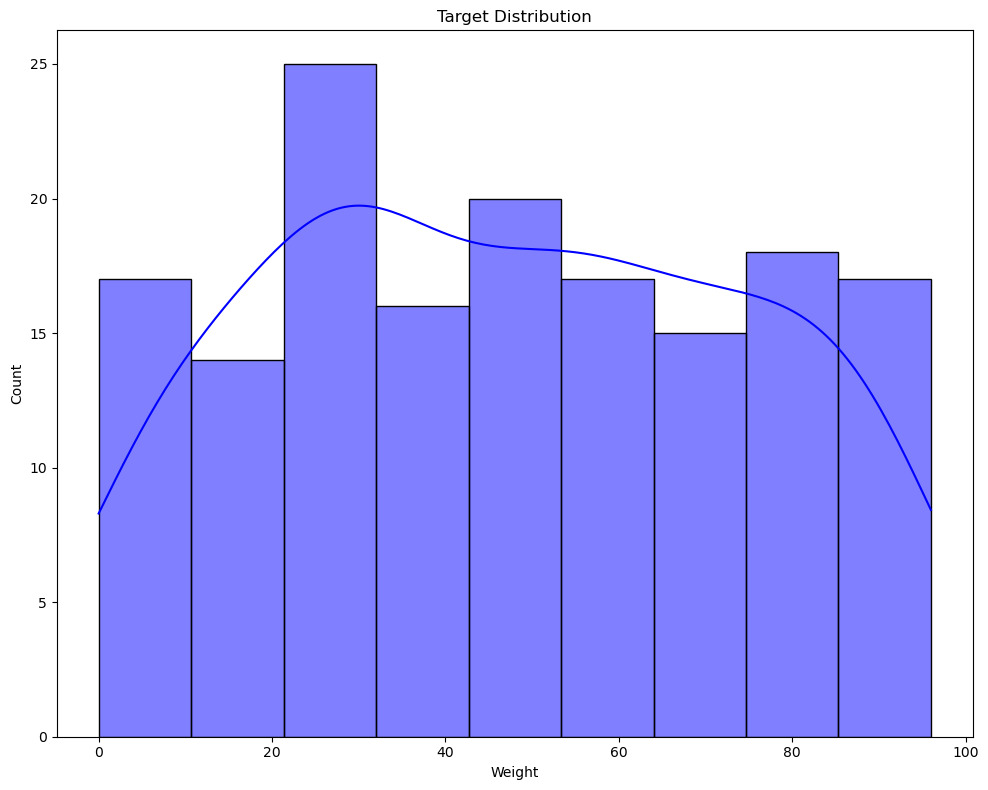

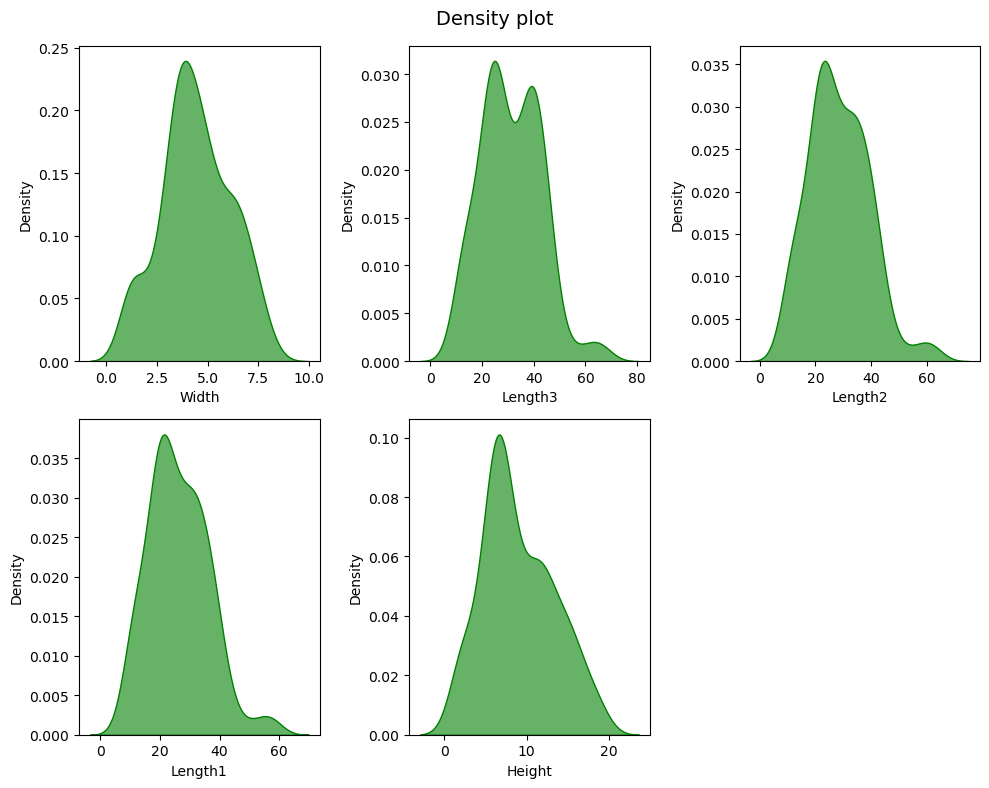

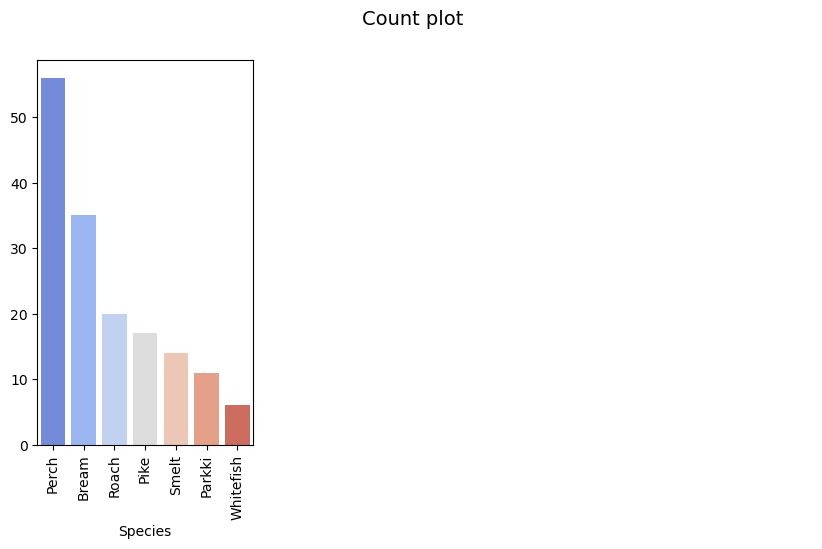

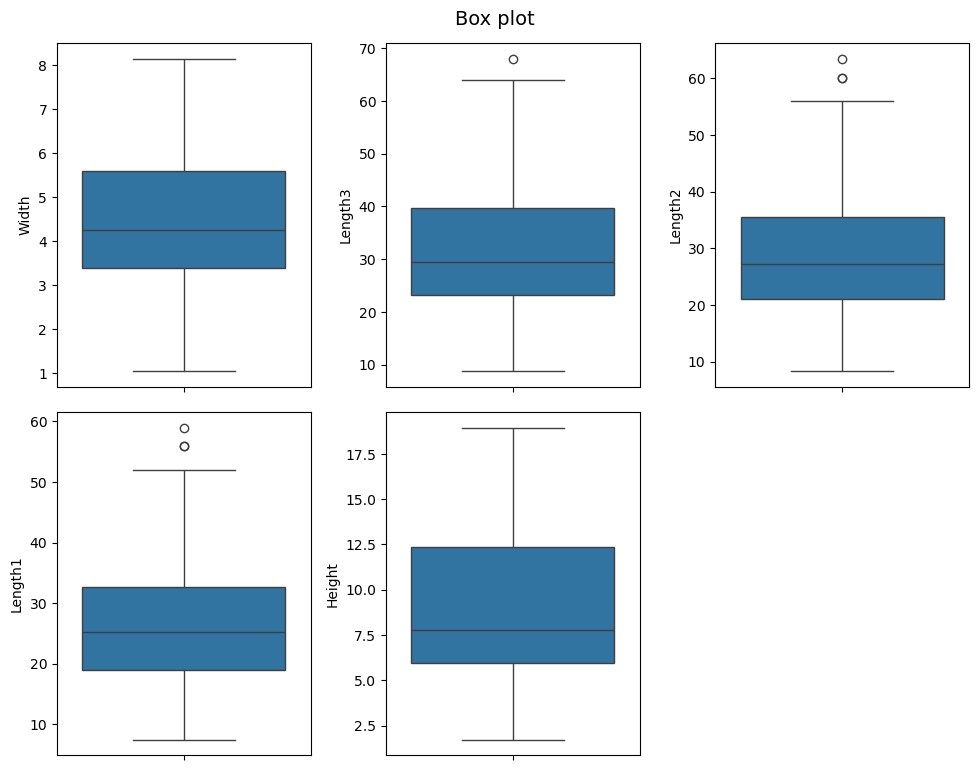

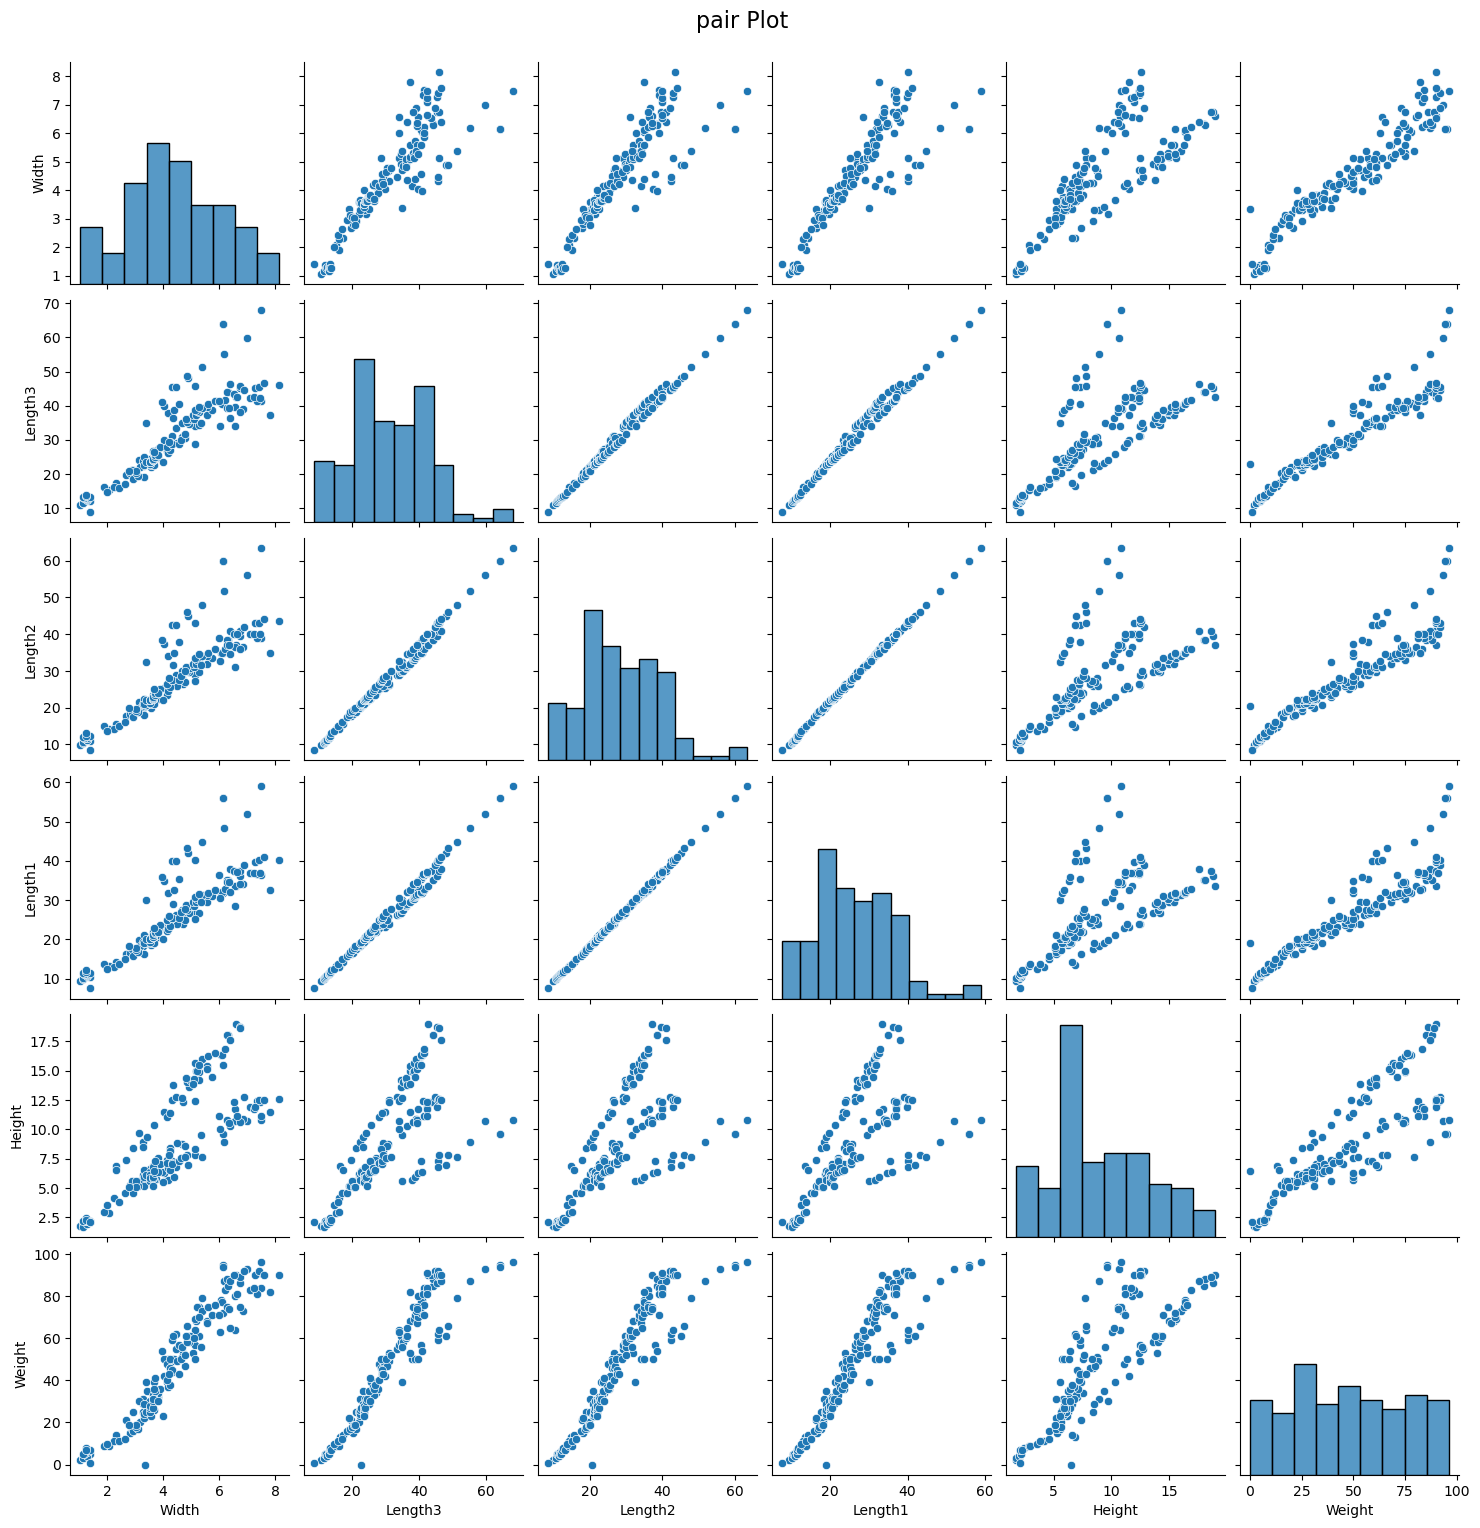

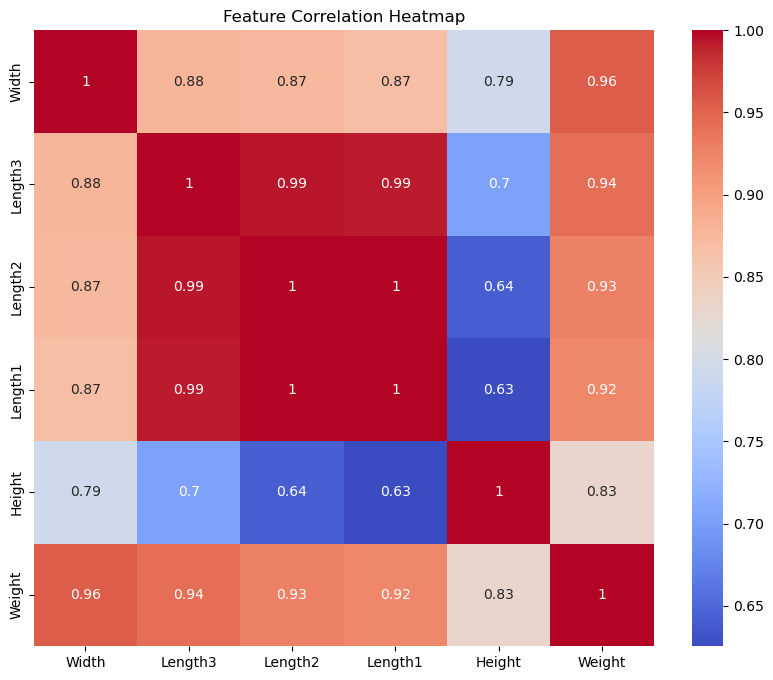

In [15]:
AutoDataPrep.visualize(data=fish_df,
                       target_column='Weight',
                       plot_type='all')

## <b><span style='color:#F1A424'>| 5.</span> Deployed prepared data </b>

In [16]:
reg_prep.deploy(table_name="fish_prep")

Data deployed successfully to the table:  fish_prep


In [17]:
remove_context()

True